# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 181.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 135.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 241.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 255.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 199.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 259.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [3]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/content/train.csv')
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()
train.info()
train.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
test.describe()
test.info()
test.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('/content/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [10]:
submission.info()
submission.describe()
submission.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


Index(['datetime', 'count'], dtype='object')

variable not available in test dataset


In [11]:
list(set(train.columns).difference(set(test.columns)))

['count', 'casual', 'registered']

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
label='count'
ignored=['casual','registered']
metric='root_mean_squared_error'
time=600
preset='best_quality'



In [13]:
predictor = TabularPredictor(label=label,problem_type='regression',
                             eval_metric=metric,learner_kwargs={'ignored_columns': ignored}).fit(train_data=train,
                                                                                                time_limit=time,presets=preset)

No path specified. Models will be saved in: "AutogluonModels/ag-20240423_093652"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240423_093652/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 193 seconds

### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.094847  root_mean_squared_error      19.637913  389.317161                0.000892           0.040263            3       True         11
1   RandomForestMSE_BAG_L2  -53.432919  root_mean_squared_error      14.882366  298.425965                0.679878          49.033989            2       True         10
2          LightGBM_BAG_L2  -54.967574  root_mean_squared_error      14.586437  277.264632                0.383949          27.872656            2       True          9
3        LightGBMXT_BAG_L2  -60.507667  root_mean_squared_error      18.573194  312.370253                4.370706          62.978276            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.057573    0.051555   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.15176278473396,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.5076669632503,
  'LightGBM_BAG_L2': -54.9675744

### Create predictions from test dataset

In [15]:
predictions = predictor.predict(test)
predictions.head()

0    24.055206
1    43.521568
2    46.620121
3    50.046688
4    52.104591
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [16]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.304413
std        89.751305
min         3.183321
25%        19.435591
50%        63.710281
75%       167.215698
max       366.087799
Name: count, dtype: float64

In [17]:
# How many negative values do we have?

set_predictions=predictions.apply(lambda x: 1 if x<0 else  0)
neg_count=(set_predictions==1).sum()
print(neg_count)

0


In [18]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 284kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2024-04-23 09:48:23  first raw submission  complete  1.8053       1.8053        
submission_new_features.csv  2024-04-23 08:05:57  new features          complete  0.46327      0.46327       
submission.csv               2024-04-23 06:17:24  first raw submission  complete  1.79973      1.79973       


#### Initial score of `1.79973`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

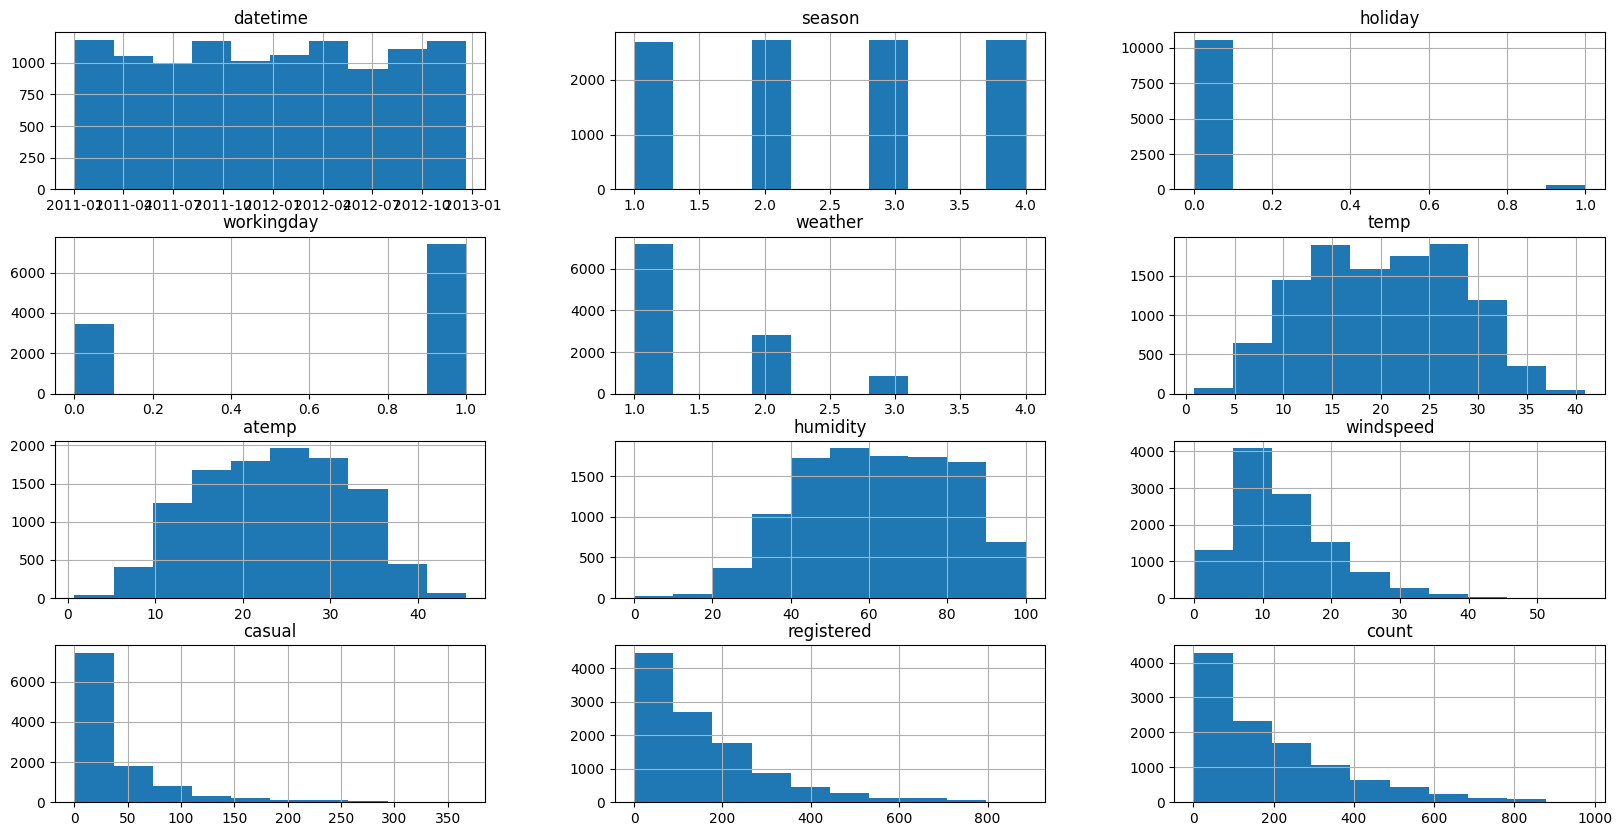

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,10))
plt.show()

In [23]:
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [24]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.dayofweek
train['hour']=train['datetime'].dt.hour
# train.drop(["datetime"], axis=1, inplace=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [25]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.dayofweek
test['hour']=test['datetime'].dt.hour
test.drop(["datetime"],axis=1,inplace=True)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


In [26]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), 

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [27]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: category(2), dateti

In [28]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

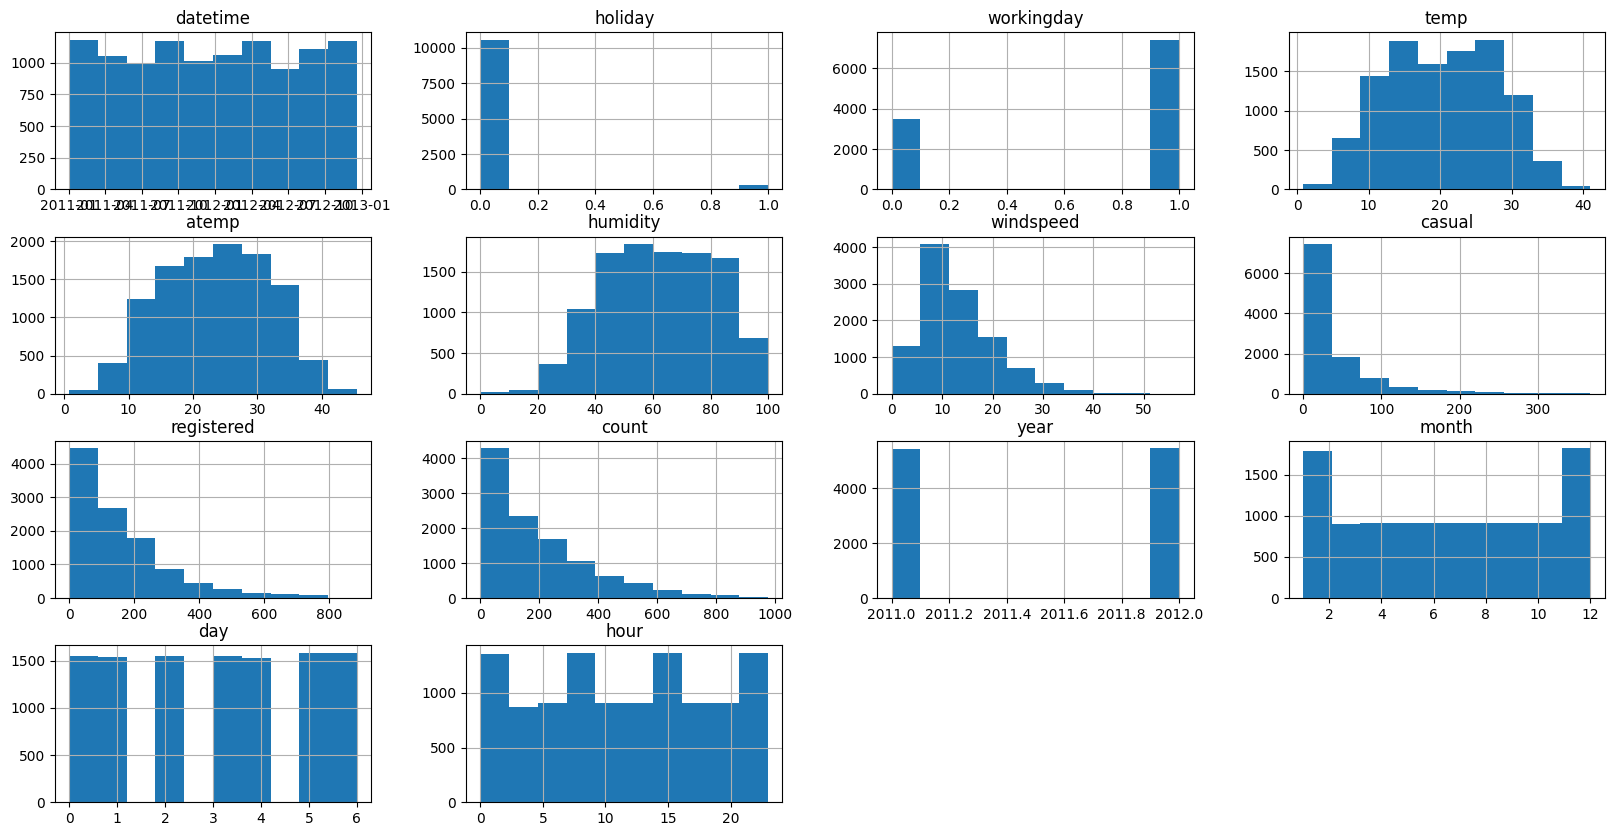

In [29]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,10))

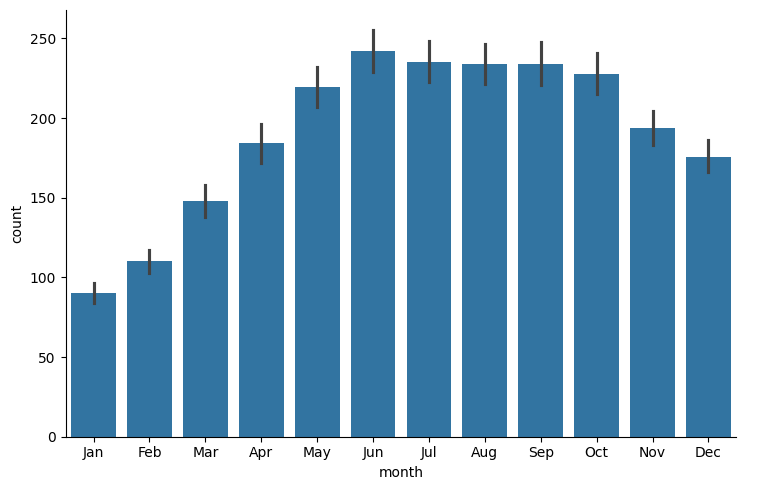

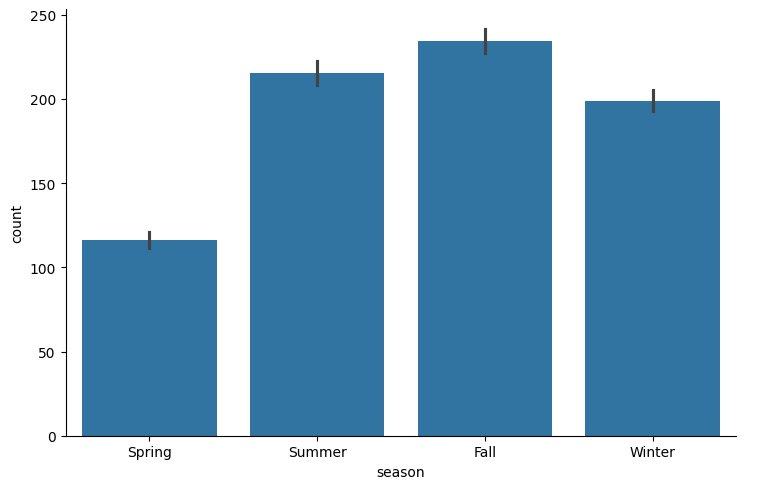

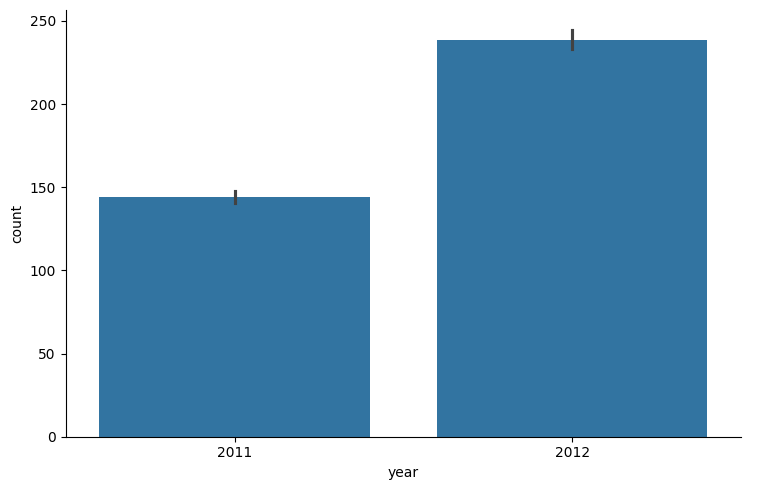

In [30]:
sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.xticks(ticks=range(4), labels=["Spring", "Summer", "Fall", "Winter"])

sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)

plt.tight_layout()
plt.show()


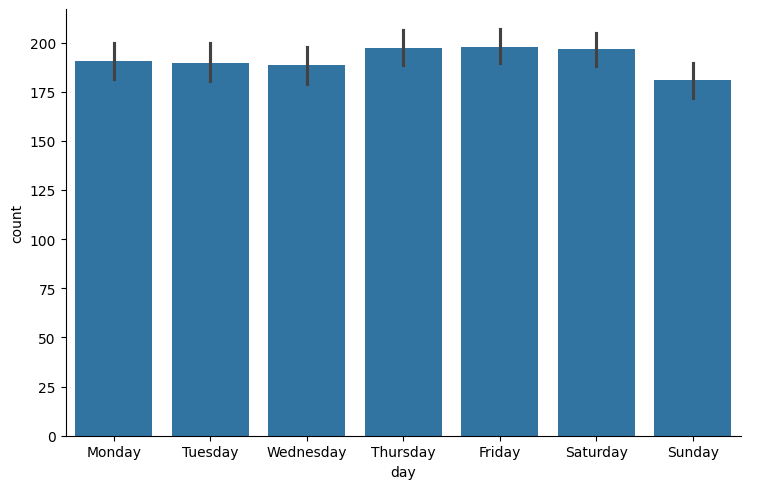

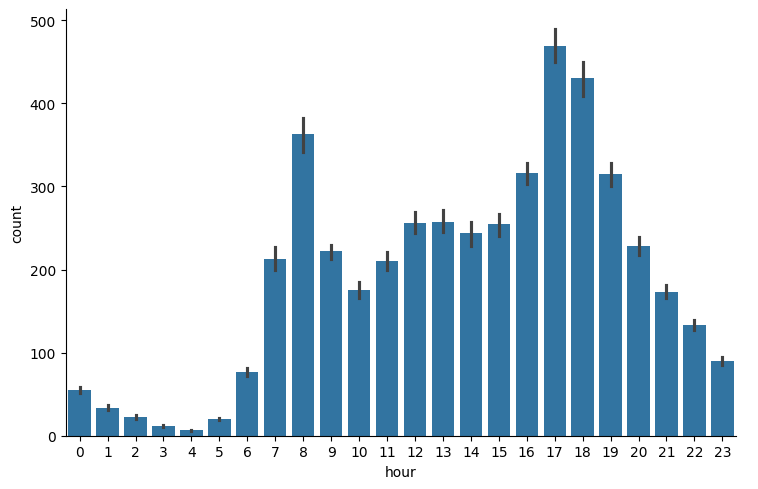

In [31]:
sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday",
                                     "Thursday", "Friday", "Saturday", "Sunday"])
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.show()

In [32]:
train.info()
train.drop(["datetime"], axis=1, inplace=True)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: category(2), dateti

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [33]:
#creating a new feature called peak_hour
def is_peak_hour(hour):
  if (hour >= 7 and hour <= 9) or (hour >= 16 and hour <= 19):
      return 1  # Peak hour
  else:
      return 0  # Non-peak hour

# Apply the function to create the new feature
train['peak_hour'] = train['hour'].apply(is_peak_hour)
test['peak_hour']=test['hour'].apply(is_peak_hour)

In [34]:
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

## Step 5: Rerun the model with the same settings as before, just with more features

In [35]:
label='count'
ignored=['casual','registered']
metric='root_mean_squared_error'
time=600
preset='best_quality'

In [36]:
predictor_new_features = TabularPredictor(label=label,problem_type='regression',
                             eval_metric=metric,learner_kwargs={'ignored_columns': ignored}).fit(train_data=train,
                                                                                                time_limit=time,presets=preset)

No path specified. Models will be saved in: "AutogluonModels/ag-20240423_094843"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240423_094843/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 188 seconds

In [37]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.031343  root_mean_squared_error      18.028465  367.120504                0.001194           0.086201            3       True         13
1      WeightedEnsemble_L2  -34.235794  root_mean_squared_error      16.467319  262.094629                0.000883           0.030056            2       True          8
2          LightGBM_BAG_L2  -34.668868  root_mean_squared_error      17.057418  287.855383                0.247875          25.712325            2       True         10
3   RandomForestMSE_BAG_L2  -34.791682  root_mean_squared_error      17.525852  317.196486                0.716309          55.053427            2       True         11
4          CatBoost_BAG_L2  -34.867170  root_mean_squared_error      17.063087  286.268551   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.26164315463612,
  'KNeighborsDist_BAG_L1': -109.84517207130654,
  'LightGBMXT_BAG_L1': -36.400050980255074,
  'LightGBM_BAG_L1': -35.57176270699848,
  'RandomForestMSE_BAG_L1': -39.667892065134886,
  'CatBoost_BAG_L1': -36.5767309281729,
  'ExtraTree

In [38]:
# create predictions
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    15.095769
1     5.874838
2     3.989726
3     3.191858
4     3.229222
Name: count, dtype: float32

In [39]:
# Remember to set all negative values to zero
predictions_new_features.describe()
predictions_new_features[predictions_new_features<0] = 0

In [40]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [41]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 146kB/s]
Successfully submitted to Bike Sharing Demand

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-23 09:59:48  new features          complete  0.46351      0.46351       
submission.csv               2024-04-23 09:48:23  first raw submission  complete  1.8053       1.8053        
submission_new_features.csv  2024-04-23 08:05:57  new features          complete  0.46327      0.46327       


#### New Score of `0.46327`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [45]:
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]
train_data = train
time_limit = 600
presets = "optimize_for_deployment"

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import autogluon.core as ag
from autogluon.common import space

hyperparameters = {
    'GBM': [ # Modify GBM hyperparameters as needed
        {'extra_trees': True,
         'num_boost_round': space.Int(lower=100, upper=500, default=100),
         'num_leaves': space.Int(lower=25, upper=64, default=36),
         'ag_args': {'name_suffix': 'XT'}
        },
        {},  # Default options for GBM
        'GBMLarge'  # GBM model type
    ],
    'NN_TORCH': { # Modify neural network hyperparameters as needed
        'num_epochs': 10,  # Increase the number of epochs for neural network models
        'learning_rate': space.Real(1e-5, 1e-3, default=5e-4, log=True),  # Modify learning rate range
        'activation': space.Categorical('relu', 'softrelu', 'tanh', 'gelu'),  # Add more activation functions
        'dropout_prob': space.Real(0.0, 0.5, default=0.1)
    }
}

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')


No path specified. Models will be saved in: "AutogluonModels/ag-20240423_100152"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240423_100152"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.26 GB / 12.67 GB (80.9%)
Disk Space Avail:   74.19 GB / 107.72 GB (68.9%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10505.37 MB
	Train Data (Original)  Memory Usage: 0.69 MB (0.0% of available 

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-63.7122	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-42.9901	 = Validation score   (-root_mean_squared_error)
	1.16s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-42.9935	 = Validation score   (-root_mean_squared_error)
	1.81s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-40.9372	 = Validation score   (-root_mean_squared_error)
	0.97s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-55.6274	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-83.8681	 = Validation score   (-root_mean_squared_error)
	0.8s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-44.0506	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 39.1317
[1000]	valid_set's rmse: 39.6263
[1000]	valid_set's rmse: 39.9551
[2000]	valid_set's rmse: 38.6788
[3000]	valid_set's rmse: 38.4513
[4000]	valid_set's rmse: 38.3969
[5000]	valid_set's rmse: 38.436
[1000]	valid_set's rmse: 39.6166
[1000]	valid_set's rmse: 39.5802
[1000]	valid_set's rmse: 39.5313
[2000]	valid_set's rmse: 38.8999
[3000]	valid_set's rmse: 38.7955
[1000]	valid_set's rmse: 38.4803
[2000]	valid_set's rmse: 38.1659
[1000]	valid_set's rmse: 39.5034
[2000]	valid_set's rmse: 38.7473
[1000]	valid_set's rmse: 38.3327
[2000]	valid_set's rmse: 38.1196
[1000]	valid_set's rmse: 40.396
[2000]	valid_set's rmse: 39.4726
[3000]	valid_set's rmse: 39.1718
[4000]	valid_set's rmse: 39.0938
[1000]	valid_set's rmse: 43.4257
[2000]	valid_set's rmse: 40.6463
[3000]	valid_set's rmse: 40.0563
[4000]	valid_set's rmse: 39.7109
[5000]	valid_set's rmse: 39.6466
[6000]	valid_set's rmse: 39.4971
[7000]	valid_set's rmse: 39.5415
[1000]	valid_set's rmse: 39.4956
[2000]	valid

	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-39.0585	 = Validation score   (-root_mean_squared_error)
	5.41s	 = Training   runtime
	0.36s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.5842	 = Validation score   (-root_mean_squared_error)
	2.41s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.4415	 = Validation score   (-root_mean_squared_error)
	2.66s	 = Training   runtime
	0.3s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.3914	 = Validation score   (-root_mean_squared_error)
	11.38s	 = Training   runtime
	1.5s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.1643	 = Validation score   (-root_mean_squared_error)
	1.15s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.5177	 = Validation score   (-root_mean_squared_error)
	3.48s	 = Training   runtime
	0.51s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-39.3544	 = Validation score   (-root_mean_square

[1000]	valid_set's rmse: 38.518


	-38.486	 = Validation score   (-root_mean_squared_error)
	2.89s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 413.01s of remaining time.
	Ensemble Weights: {'LightGBM/T13': 0.435, 'LightGBMLarge': 0.304, 'LightGBM/T11': 0.261}
	-37.7905	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 187.05s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" m

In [65]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.790526  root_mean_squared_error       2.281308  13.947045                0.001106           0.015277            2       True          4
1         LightGBM/T13 -38.105883  root_mean_squared_error       1.068810   4.974201                1.068810           4.974201            1       True          2
2         LightGBM/T11 -38.153668  root_mean_squared_error       0.856392   6.065010                0.856392           6.065010            1       True          1
3        LightGBMLarge -38.486011  root_mean_squared_error       0.355000   2.892557                0.355000           2.892557            1       True          3
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'LGBModel'}
Bagging used: False 
Multi-layer

{'model_types': {'LightGBM/T11': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T11': -38.153668193310494,
  'LightGBM/T13': -38.10588265458422,
  'LightGBMLarge': -38.48601120999355,
  'WeightedEnsemble_L2': -37.79052557519809},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T11': ['LightGBM', 'T11'],
  'LightGBM/T13': ['LightGBM', 'T13'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T11': 6.065009832382202,
  'LightGBM/T13': 4.974201440811157,
  'LightGBMLarge': 2.892557144165039,
  'WeightedEnsemble_L2': 0.015276670455932617},
 'model_pred_times': {'LightGBM/T11': 0.8563919067382812,
  'LightGBM/T13': 1.0688104629516602,
  'LightGBMLarge': 0.3549997806549072,
  'WeightedEnsemble_L2': 0.00110626220703125},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/T1

In [52]:
predictor_new_hpo_feat=predictor_new_hpo.predict(test)
predictor_new_hpo_feat.head()

0    16.857506
1     4.611214
2     1.760520
3     1.195026
4     1.137852
Name: count, dtype: float32

In [63]:
# Remember to set all negative values to zero
predictor_new_hpo_feat.describe()
predictor_new_hpo_feat[predictor_new_hpo_feat<0] = 0

count    6493.000000
mean      190.429291
std       173.827118
min         0.000000
25%        46.305882
50%       147.487061
75%       284.043640
max       944.022827
Name: count, dtype: float64

In [54]:
# submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [55]:
# Same submitting predictions
submission_new_hpo["count"] = predictor_new_hpo_feat
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 282kB/s]
Successfully submitted to Bike Sharing Demand

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-23 10:13:06  new features with hyperparameters  complete  0.51326      0.51326       
submission_new_features.csv  2024-04-23 09:59:48  new features                       complete  0.46351      0.46351       
submission.csv               2024-04-23 09:48:23  first raw submission               complete  1.8053       1.8053        
submission_new_features.csv  2024-04-23 08:05:57  new features                       complete  0.46327      0.46327       
submission.csv               2024-04-23 06:17:24  first raw submission               complete  1.79973      1.79973       


#### New Score of `0.51326`

two more parameters pending _1,_2

In [70]:
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]
train_data = train
time_limit = 600
presets = "optimize_for_deployment"

In [72]:
import autogluon.core as ag
from autogluon.common import space

# Define hyperparameters for kNN
knn_options = {
    'weights': space.Categorical('uniform', 'distance'),  # Weight function used in prediction
    'n_neighbors': space.Int(lower=1, upper=100, default=5),  # Number of neighbors
    'p': space.Int(lower=1, upper=2, default=2),  # Power parameter for the Minkowski metric
}

# Combine hyperparameters for all model types
hyperparameters = {
    'GBM': [
        {'extra_trees': True,
         'num_boost_round': space.Int(lower=100, upper=500, default=100),
         'num_leaves': space.Int(lower=25, upper=64, default=36),
         'ag_args': {'name_suffix': 'XT'}
        },
        {},  # Default options for GBM
        'GBMLarge'  # GBM model type
    ],
    'NN_TORCH': {
        'num_epochs': 10,
        'learning_rate': space.Real(1e-5, 1e-3, default=5e-4, log=True),
        'activation': space.Categorical('relu', 'softrelu', 'tanh', 'gelu'),
        'dropout_prob': space.Real(0.0, 0.5, default=0.1)
    },
    'KNN': knn_options  # Include kNN hyperparameters
}

# Hyperparameter tuning settings
num_trials = 20
search_strategy = 'auto'
scheduler = 'local'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

# Train AutoGluon predictor with hyperparameter tuning
predictor_new_hpo1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')


No path specified. Models will be saved in: "AutogluonModels/ag-20240423_105117"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240423_105117"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.09 GB / 12.67 GB (79.6%)
Disk Space Avail:   74.12 GB / 107.72 GB (68.8%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10333.73 MB
	Train Data (Original)  Memory Usage: 0.69 MB (0.0% of available 

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: KNeighbors/T1 ...
	-115.323	 = Validation score   (-root_mean_squared_error)
	0.07s	 = Training   runtime
	0.33s	 = Validation runtime
Fitted model: KNeighbors/T2 ...
	-120.6338	 = Validation score   (-root_mean_squared_error)
	0.06s	 = Training   runtime
	0.77s	 = Validation runtime
Fitted model: KNeighbors/T3 ...
	-123.3933	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.9s	 = Validation runtime
Fitted model: KNeighbors/T4 ...
	-123.7437	 = Validation score   (-root_mean_squared_error)
	0.06s	 = Training   runtime
	0.79s	 = Validation runtime
Fitted model: KNeighbors/T5 ...
	-129.3569	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.78s	 = Validation runtime
Fitted model: KNeighbors/T6 ...
	-123.5641	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.34s	 = Validation runtime
Fitted model: KNeighbors/T7 ...
	-123.4416	 = Validation score   (-root_mean_squared_error)
	0.02s	 = 

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-63.7122	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-42.9901	 = Validation score   (-root_mean_squared_error)
	1.11s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-42.9935	 = Validation score   (-root_mean_squared_error)
	1.45s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-40.9372	 = Validation score   (-root_mean_squared_error)
	2.44s	 = Training   runtime
	0.27s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-55.6274	 = Validation score   (-root_mean_squared_error)
	1.42s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-83.8681	 = Validation score   (-root_mean_squared_error)
	1.61s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-44.0506	 = Validation score   (-root_mean_squared_error)
	1.07s	 = Train

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 39.1317
[1000]	valid_set's rmse: 39.6263
[1000]	valid_set's rmse: 39.9551
[2000]	valid_set's rmse: 38.6788
[3000]	valid_set's rmse: 38.4513
[4000]	valid_set's rmse: 38.3969
[5000]	valid_set's rmse: 38.436
[1000]	valid_set's rmse: 39.6166
[1000]	valid_set's rmse: 39.5802
[1000]	valid_set's rmse: 39.5313
[2000]	valid_set's rmse: 38.8999
[3000]	valid_set's rmse: 38.7955
[1000]	valid_set's rmse: 38.4803
[2000]	valid_set's rmse: 38.1659


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-39.0585	 = Validation score   (-root_mean_squared_error)
	1.87s	 = Training   runtime
	0.27s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.5842	 = Validation score   (-root_mean_squared_error)
	1.58s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.4415	 = Validation score   (-root_mean_squared_error)
	2.08s	 = Training   runtime
	0.4s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.3914	 = Validation score   (-root_mean_squared_error)
	27.29s	 = Training   runtime
	4.84s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.1643	 = Validation score   (-root_mean_squared_error)
	2.0s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.5177	 = Validation score   (-root_mean_squared_error)
	6.3s	 = Training   runtime
	0.54s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-39.3544	 = Validation score   (-root_mean_squared

[1000]	valid_set's rmse: 38.518


	-38.486	 = Validation score   (-root_mean_squared_error)
	4.31s	 = Training   runtime
	0.81s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 427.68s of remaining time.
	Ensemble Weights: {'LightGBM/T11': 0.348, 'LightGBMLarge': 0.348, 'LightGBM/T10': 0.217, 'LightGBM/T9': 0.087}
	-37.7886	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.01s	 = Validation runtime
AutoGluon training complete, total runtime = 172.43s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which

In [73]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.788602  root_mean_squared_error       7.355852  33.123379                0.008200           0.043805            2       True          5
1         LightGBM/T11 -38.153668  root_mean_squared_error       2.131576   9.052785                2.131576           9.052785            1       True          3
2        LightGBMLarge -38.486011  root_mean_squared_error       0.807356   4.311078                0.807356           4.311078            1       True          4
3          LightGBM/T9 -38.777118  root_mean_squared_error       4.328719  17.835887                4.328719          17.835887            1       True          1
4         LightGBM/T10 -39.046112  root_mean_squared_error       0.080001   1.879825                0.080001           1.87

{'model_types': {'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T9': -38.777117753147664,
  'LightGBM/T10': -39.04611225632431,
  'LightGBM/T11': -38.153668193310494,
  'LightGBMLarge': -38.48601120999355,
  'WeightedEnsemble_L2': -37.78860151444386},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T9': ['LightGBM', 'T9'],
  'LightGBM/T10': ['LightGBM', 'T10'],
  'LightGBM/T11': ['LightGBM', 'T11'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T9': 17.83588695526123,
  'LightGBM/T10': 1.8798246383666992,
  'LightGBM/T11': 9.05278468132019,
  'LightGBMLarge': 4.311077833175659,
  'WeightedEnsemble_L2': 0.04380512237548828},
 'model_pred_times': {'LightGBM/T9': 4.328719139099121,
  'LightGBM/T10': 0.08000063896179199,
  'LightGBM/T11': 2.1315760

In [74]:
predictor_new_hpo1_feat=predictor_new_hpo.predict(test)
predictor_new_hpo1_feat.head()

0    16.857506
1     4.611214
2     1.760520
3     1.195026
4     1.137852
Name: count, dtype: float32

In [82]:
predictor_new_hpo1_feat.describe()
predictor_new_hpo1_feat[predictor_new_hpo1_feat<0] = 0

In [83]:
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [84]:
# Same submitting predictions
submission_new_hpo1["count"] = predictor_new_hpo1_feat
submission_new_hpo1.to_csv("submission_new_hpo.csv", index=False)

In [85]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters1"

100% 188k/188k [00:00<00:00, 283kB/s]
Successfully submitted to Bike Sharing Demand

In [86]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-23 10:56:52  new features with hyperparameters1  complete  0.51326      0.51326       
submission_new_hpo.csv       2024-04-23 10:55:36  new features with hyperparameters1  error                                
submission_new_hpo.csv       2024-04-23 10:13:06  new features with hyperparameters   complete  0.51326      0.51326       
submission_new_features.csv  2024-04-23 09:59:48  new features                        complete  0.46351      0.46351       
submission.csv               2024-04-23 09:48:23  first raw submission                complete  1.8053       1.8053        


hyper_parameter2


In [94]:
import autogluon.core as ag
from autogluon.tabular import TabularPredictor
from autogluon.common import space

# Define hyperparameters for kNN
knn_options = {
    'weights': space.Categorical('uniform', 'distance'),  # Weight function used in prediction
    'n_neighbors': space.Int(lower=1, upper=50, default=5),  # Number of neighbors
    'p': space.Int(lower=1, upper=3, default=2),  # Power parameter for the Minkowski metric
    'algorithm': space.Categorical('auto', 'ball_tree', 'kd_tree', 'brute'),  # Algorithm used to compute nearest neighbors
    'leaf_size': space.Int(lower=10, upper=100, default=30),  # Leaf size passed to BallTree or KDTree
    'metric': space.Categorical('euclidean', 'manhattan', 'minkowski'),  # Distance metric

}
# Define hyperparameters for XGBoost
xgb_options = {
    'num_boost_round': space.Int(lower=50, upper=300, default=100),
    'max_depth': space.Int(lower=3, upper=8, default=6),
    'eta': space.Real(lower=0.01, upper=0.5, default=0.1),
    'gamma': space.Real(lower=0.0, upper=10.0, default=1.0),
    'min_child_weight': space.Real(lower=1.0, upper=10.0, default=1.0),

}

# Combine hyperparameters for all model types
hyperparameters = {
    'GBM': [
        {'extra_trees': True,
         'num_boost_round': space.Int(lower=100, upper=500, default=100),
         'num_leaves': space.Int(lower=25, upper=64, default=36),
         'ag_args': {'name_suffix': 'XT'}
        },
        {},  # Default options for GBM
        'GBMLarge'  # GBM model type
    ],
    'NN_TORCH': {
        'num_epochs': 10,
        'learning_rate': space.Real(1e-5, 1e-3, default=5e-4, log=True),
        'activation': space.Categorical('relu', 'softrelu', 'tanh', 'gelu'),
        'dropout_prob': space.Real(0.0, 0.5, default=0.1)
    },
    'KNN': knn_options,
    'XGB': xgb_options,
}

# Hyperparameter tuning settings
num_trials = 20
search_strategy = 'auto'
scheduler = 'local'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

# Train AutoGluon predictor with hyperparameter tuning
predictor_new_hpo2 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')


No path specified. Models will be saved in: "AutogluonModels/ag-20240423_110824"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240423_110824"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.03 GB / 12.67 GB (79.1%)
Disk Space Avail:   74.05 GB / 107.72 GB (68.7%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10269.23 MB
	Train Data (Original)  Memory Usage: 0.69 MB (0.0% of available 

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: KNeighbors/T1 ...
	-115.323	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: KNeighbors/T2 ...
	-136.7282	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: KNeighbors/T3 ...
	-115.2518	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.92s	 = Validation runtime
Fitted model: KNeighbors/T4 ...
	-126.7582	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	2.46s	 = Validation runtime
Fitted model: KNeighbors/T5 ...
	-107.7484	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.92s	 = Validation runtime
Fitted model: KNeighbors/T6 ...
	-112.6886	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.46s	 = Validation runtime
Fitted model: KNeighbors/T7 ...
	-111.5025	 = Validation score   (-root_mean_squared_error)
	0.01s	 =

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-63.7122	 = Validation score   (-root_mean_squared_error)
	0.86s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-42.9901	 = Validation score   (-root_mean_squared_error)
	0.79s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-42.9935	 = Validation score   (-root_mean_squared_error)
	1.11s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-40.9372	 = Validation score   (-root_mean_squared_error)
	0.98s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-55.6274	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-83.8681	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-44.0506	 = Validation score   (-root_mean_squared_error)
	1.11s	 = Train

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 39.1317
[1000]	valid_set's rmse: 39.6263
[1000]	valid_set's rmse: 39.9551
[2000]	valid_set's rmse: 38.6788
[3000]	valid_set's rmse: 38.4513
[4000]	valid_set's rmse: 38.3969
[5000]	valid_set's rmse: 38.436
[1000]	valid_set's rmse: 39.6166
[1000]	valid_set's rmse: 39.5802
[1000]	valid_set's rmse: 39.5313
[2000]	valid_set's rmse: 38.8999
[3000]	valid_set's rmse: 38.7955


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-39.0585	 = Validation score   (-root_mean_squared_error)
	4.04s	 = Training   runtime
	0.88s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.5842	 = Validation score   (-root_mean_squared_error)
	6.51s	 = Training   runtime
	0.3s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.4415	 = Validation score   (-root_mean_squared_error)
	4.92s	 = Training   runtime
	0.85s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.3914	 = Validation score   (-root_mean_squared_error)
	24.15s	 = Training   runtime
	3.77s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.1643	 = Validation score   (-root_mean_squared_error)
	2.23s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.5177	 = Validation score   (-root_mean_squared_error)
	10.19s	 = Training   runtime
	0.5s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-39.3544	 = Validation score   (-root_mean_squar

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:11:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } 

[1000]	valid_set's rmse: 38.518


	-38.486	 = Validation score   (-root_mean_squared_error)
	4.84s	 = Training   runtime
	0.51s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 311.63s of remaining time.
	Ensemble Weights: {'LightGBMLarge': 0.435, 'LightGBM/T1': 0.13, 'LightGBM/T5': 0.13, 'XGBoost/T4': 0.13, 'XGBoost/T5': 0.087, 'LightGBM/T4': 0.043, 'XGBoost/T1': 0.043}
	-37.4373	 = Validation score   (-root_mean_squared_error)
	0.11s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 288.6s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn

In [96]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.437300  root_mean_squared_error       8.646136  76.423073                0.001161           0.109058            2       True          8
1          LightGBM/T4 -38.391359  root_mean_squared_error       3.768234  24.154427                3.768234          24.154427            1       True          2
2        LightGBMLarge -38.486011  root_mean_squared_error       0.513431   4.841764                0.513431           4.841764            1       True          7
3          LightGBM/T1 -39.058515  root_mean_squared_error       0.876920   4.044132                0.876920           4.044132            1       True          1
4          LightGBM/T5 -39.164263  root_mean_squared_error       0.119730   2.232318                0.119730           2.23

{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'XGBoost/T5': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T1': -39.05851462261228,
  'LightGBM/T4': -38.39135945923925,
  'LightGBM/T5': -39.16426288151172,
  'XGBoost/T1': -39.56545217578089,
  'XGBoost/T4': -41.56264741191622,
  'XGBoost/T5': -40.23508134004934,
  'LightGBMLarge': -38.48601120999355,
  'WeightedEnsemble_L2': -37.43729974498586},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T1': ['LightGBM', 'T1'],
  'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T5': ['LightGBM', 'T5'],
  'XGBoost/T1': ['XGBoost', 'T1'],
  'XGBoost/T4': ['XGBoost', 'T4'],
  'XGBoost/T5': ['XGBoost', 'T5'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T1': 4

In [97]:
predictor_new_hpo2_feat=predictor_new_hpo.predict(test)
predictor_new_hpo2_feat.head()

0    16.857506
1     4.611214
2     1.760520
3     1.195026
4     1.137852
Name: count, dtype: float32

In [98]:
predictor_new_hpo2_feat.describe()
predictor_new_hpo2_feat[predictor_new_hpo2_feat<0] = 0

In [100]:
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [101]:
# Same submitting predictions
submission_new_hpo2["count"] = predictor_new_hpo1_feat
submission_new_hpo2.to_csv("submission_new_hpo.csv", index=False)

In [102]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters2"

100% 188k/188k [00:01<00:00, 143kB/s]  
Successfully submitted to Bike Sharing Demand

In [103]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-23 11:16:23  new features with hyperparameters2  complete  0.51326      0.51326       
submission_new_hpo.csv       2024-04-23 10:56:52  new features with hyperparameters1  complete  0.51326      0.51326       
submission_new_hpo.csv       2024-04-23 10:55:36  new features with hyperparameters1  error                                
submission_new_hpo.csv       2024-04-23 10:13:06  new features with hyperparameters   complete  0.51326      0.51326       
submission_new_features.csv  2024-04-23 09:59:48  new features                        complete  0.46351      0.46351       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

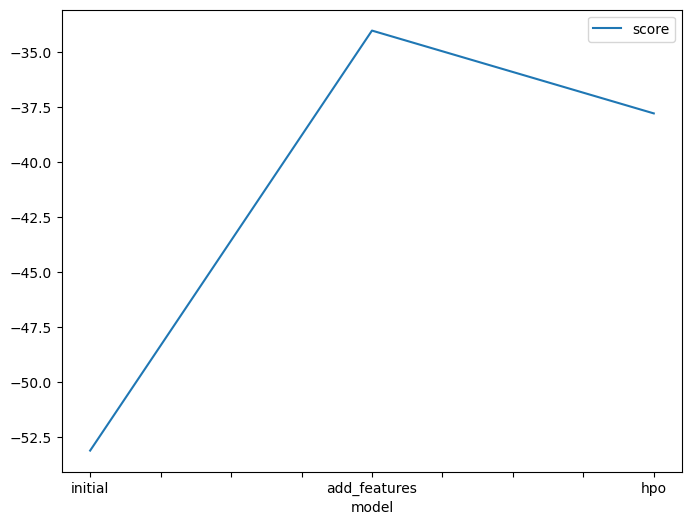

In [69]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.094847, -34.031343, -37.790526]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

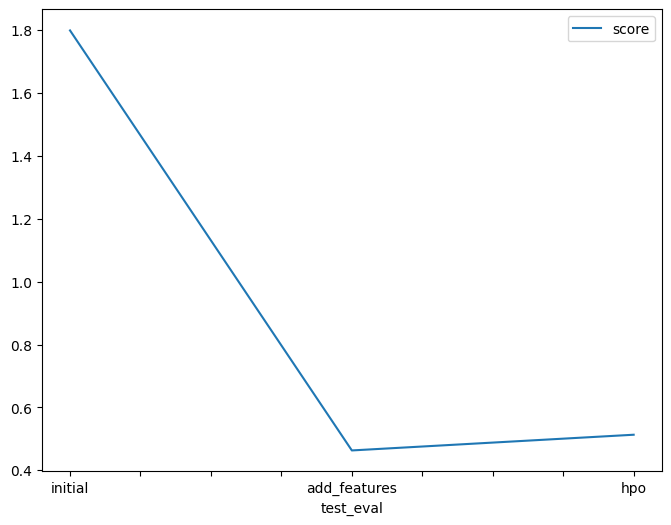

In [66]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79973, 0.46327, 0.51326]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [104]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['mentionted', 'mentioned', 'GBM,NN'],
    "hpo2": ['mentioned', 'mentioned', 'GBM,KNN,NN'],
    "hpo3": ['mentioned', 'mentioned', 'GBM,KNN,NN,XGB'],
    "score": [1.79973,0.46327 ,0.51326 ]
})

,model,hpo1,hpo2,hpo3,score
0,initial,mentionted,mentioned,mentioned,1.79973
1,add_features,mentioned,mentioned,mentioned,0.46327
2,hpo,"GBM,NN","GBM,KNN,NN","GBM,KNN,NN,XGB",0.51326
